In [8]:
import numpy as np
import matplotlib.pyplot as plt
from reconstruct import DiscreteWindowedRampFilter

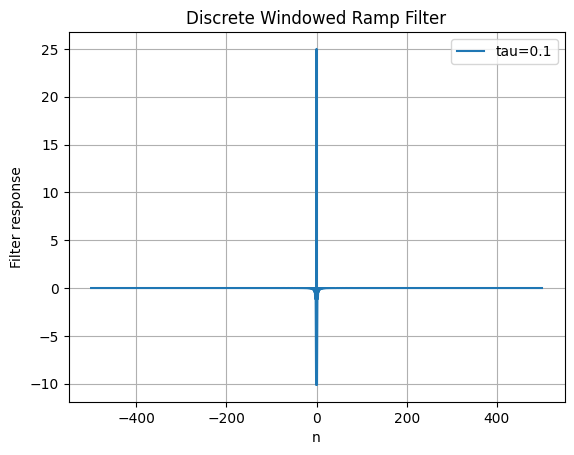

In [21]:
tau = 0.1
filter = DiscreteWindowedRampFilter(tau)

n_vec = np.arange(-500, 501)
h_vec = filter(n_vec)

plt.plot(n_vec, h_vec, label=f"tau={tau}")
plt.title("Discrete Windowed Ramp Filter")
plt.xlabel("n")
plt.ylabel("Filter response")
plt.legend()
plt.grid()
plt.show()


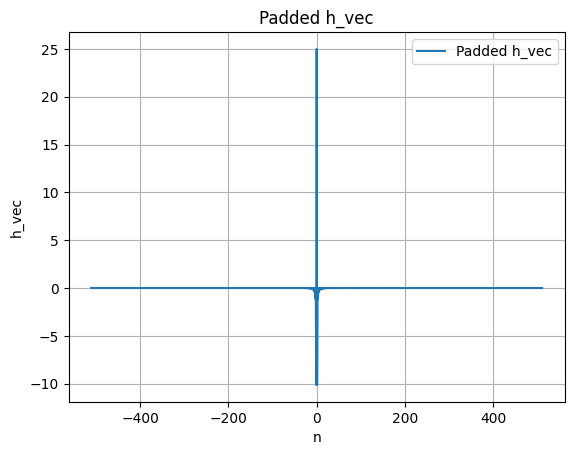

In [27]:
padded_h_vec = np.pad(h_vec, (11, 11), mode='constant', constant_values=0)
padded_n_vec = np.arange(-511, 512)
plt.plot(padded_n_vec, padded_h_vec, label="Padded h_vec")
plt.title("Padded h_vec")
plt.xlabel("n")
plt.ylabel("h_vec")
plt.legend()
plt.grid()
plt.show()


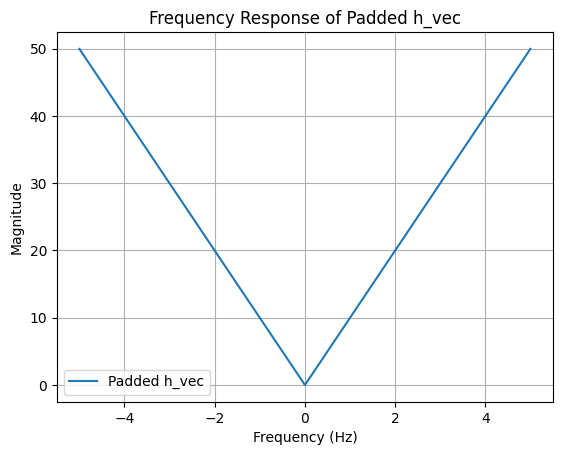

In [28]:
padded_H_vec = np.fft.fftshift(np.fft.fft(padded_h_vec))
f_vec_padded = np.fft.fftshift(np.fft.fftfreq(len(padded_H_vec), d=tau))
plt.plot(f_vec_padded, np.abs(padded_H_vec), label="Padded h_vec")
plt.title("Frequency Response of Padded h_vec") 
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()
plt.show()

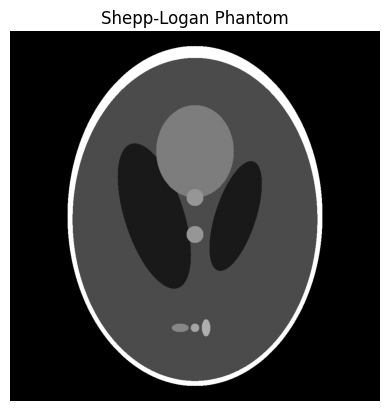

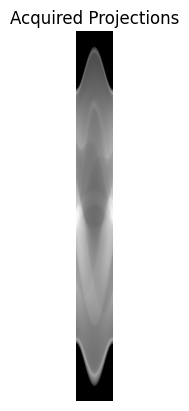

In [33]:
from shepp_logan import shepp_logan
from project import acquire_projections

N = 1001

shepp_logan_image = shepp_logan(N)
projections = acquire_projections(shepp_logan_image, n_projections=100)

plt.imshow(shepp_logan_image, cmap='gray')
plt.title("Shepp-Logan Phantom")
plt.axis('off')
plt.show()
plt.imshow(projections.T, cmap='gray')
plt.title("Acquired Projections")
plt.axis('off')
plt.show()

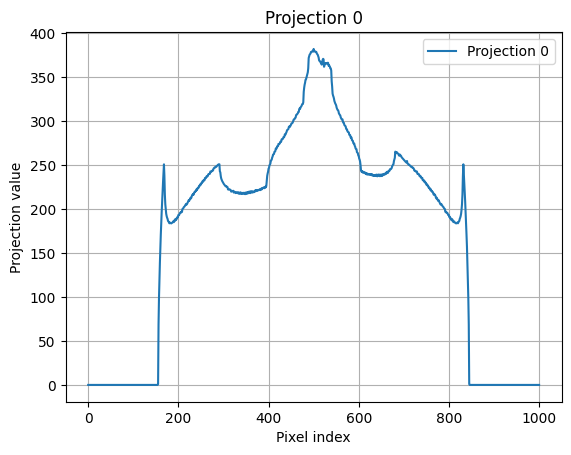

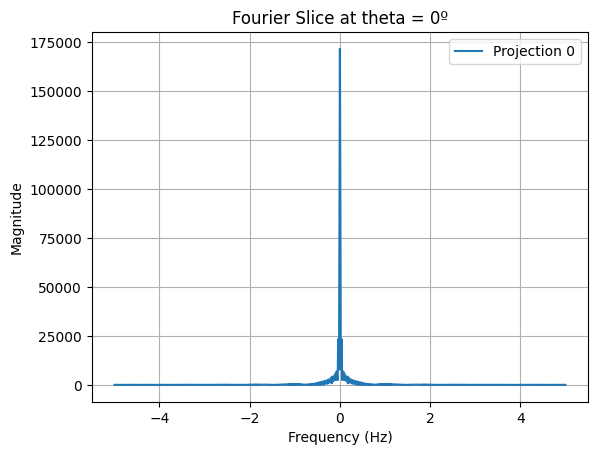

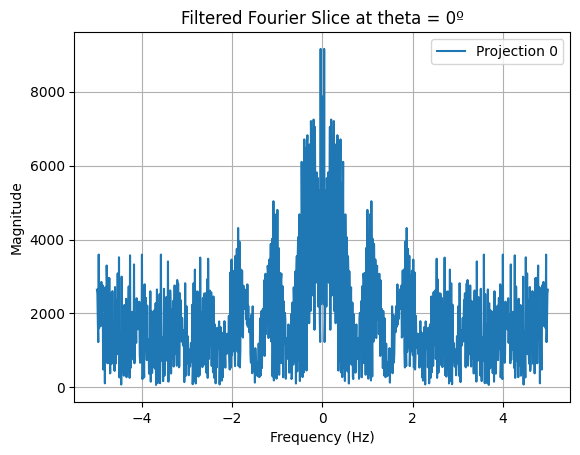

In [34]:
P_0 = projections[0]
plt.plot(P_0, label="Projection 0")
plt.title("Projection 0")
plt.xlabel("Pixel index")
plt.ylabel("Projection value")
plt.legend()
plt.grid()
plt.show()

padded_P_0 = np.pad(P_0, (11, 11), mode='constant', constant_values=0)
padded_S_0 = np.fft.fftshift(np.fft.fft(padded_P_0))
f_vec = np.fft.fftshift(np.fft.fftfreq(len(padded_P_0), d=tau))

plt.plot(f_vec, np.abs(padded_S_0), label="Projection 0")
plt.title("Fourier Slice at theta = 0º")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()
plt.show()

plt.plot(f_vec, np.abs(padded_S_0 * padded_H_vec), label="Projection 0")
plt.title("Filtered Fourier Slice at theta = 0º")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()
plt.show()


In [32]:
len(padded_S_0), len(padded_H_vec)

(1022, 1023)

In [40]:
n_pixels = 1000
n_projections = 1200
tau = 0.1

phantom = shepp_logan(n_pixels)
sinogram = acquire_projections(phantom, n_projections=n_projections)


In [ ]:
filter = DiscreteWindowedRampFilter(tau)
filter_vector = filter(np.arange(-n_pixels // 2, n_pixels // 2))

sinogram_fft = np.fft.fftshift(np.fft.fft(sinogram, axis=1), axes=1)
filter_fft = np.fft.fftshift(np.fft.fft(filter_vector))

filter_fft = np.tile(filter_fft, (sinogram.shape[0], 1))

filtered_sinogram_fft = sinogram_fft * filter_fft
filtered_projections = tau * np.fft.ifft(np.fft.ifftshift(filtered_sinogram_fft, axes=1), axis=1)


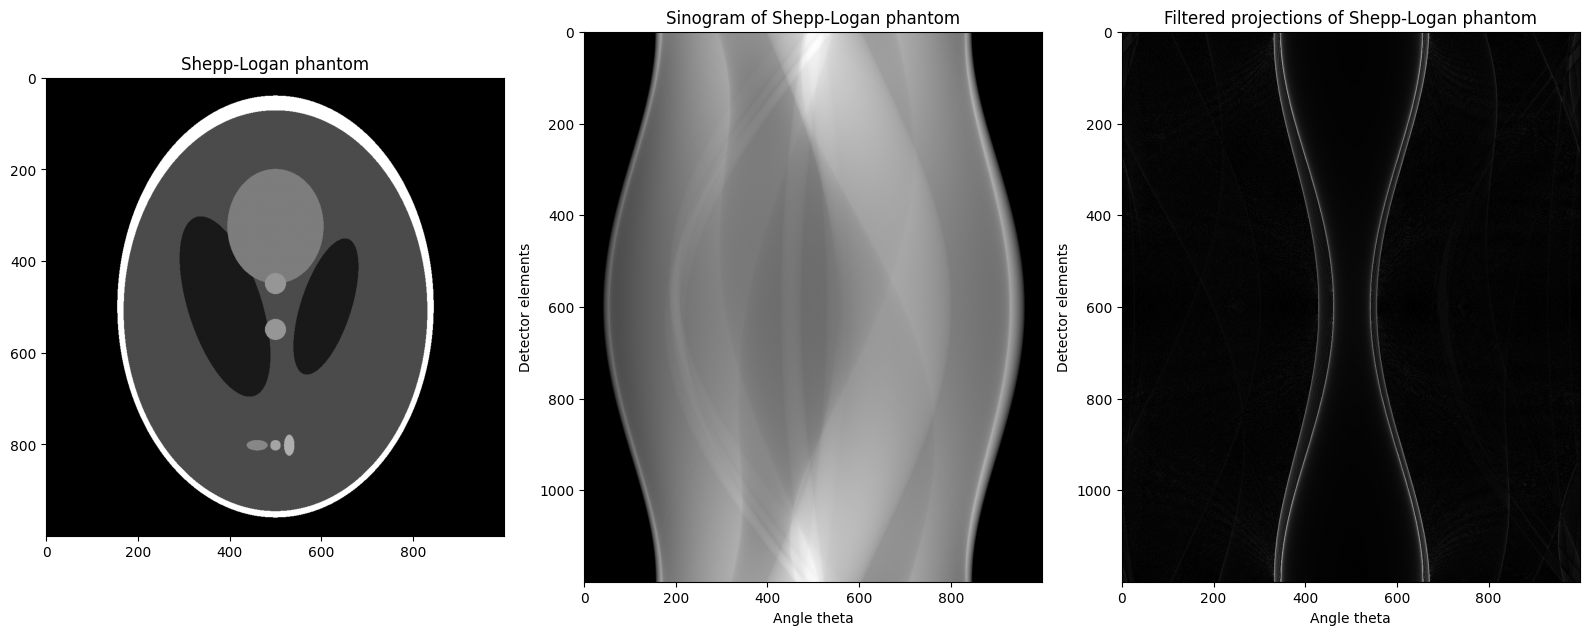

In [51]:
fig, axs = plt.subplots(1,3, figsize=(16, 48))

axs[0].imshow(phantom, cmap="gray")
axs[0].set_title("Shepp-Logan phantom")

axs[1].imshow(sinogram, cmap="gray")
axs[1].set_title("Sinogram of Shepp-Logan phantom")
axs[1].set_xlabel("Angle theta")
axs[1].set_ylabel("Detector elements")

axs[2].imshow(np.abs(filtered_projections), cmap="gray")
axs[2].set_title("Filtered projections of Shepp-Logan phantom")
axs[2].set_xlabel("Angle theta")
axs[2].set_ylabel("Detector elements")

plt.tight_layout()